# AMAZON

In [90]:
import pandas as pd
import numpy as np
import tweepy
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
import spacy
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
#from selenium import webdriver

In [79]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1 - Business Problem

Extract reviews of any product from ecommerce website like amazon and also perform Emotion Mining



## 2 - Data collection and description

Connecting to Amazon and download reviews

In [80]:
dkwatch_reviews=[]

In [81]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07B6JD5ZH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    dkwatch_reviews = dkwatch_reviews+op

Downloading review from Amazon.in for the watch Daniel Klein

In [82]:
dkwatch_reviews = list(set(dkwatch_reviews))

## PREPROCESSING

In [83]:

txt_upd = ' '.join(dkwatch_reviews)

In [84]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [87]:
txt_upd1 = txt_upd

In [88]:
txt_upd1

' good product na the media could not be loaded watch is good but the box in which it was placed looks like it s an old and used one very bea uti ful watch can t believe it s just it s just so elegant pretty for casual outfit or party looks those who are looking for an amazing surprise just go for it the colour is blue but it s suitable for indian skin tone the product was satisfied worth to buy it satisfactory gifted n she really liked it locking arrangement can be littebit difficult '

In [46]:
#Punctuation
no_punc_text = txt_upd.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

' good product na the media could not be loaded watch is good but the box in which it was placed looks like it s an old and used one very bea uti ful watch can t believe it s just it s just so elegant pretty for casual outfit or party looks those who are looking for an amazing surprise just go for it the colour is blue but it s suitable for indian skin tone the product was satisfied worth to buy it satisfactory gifted n she really liked it locking arrangement can be littebit difficult '

In [48]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['good', 'product', 'na', 'the', 'media', 'could', 'not', 'be', 'loaded', 'watch', 'is', 'good', 'but', 'the', 'box', 'in', 'which', 'it', 'was', 'placed', 'looks', 'like', 'it', 's', 'an', 'old', 'and', 'used', 'one', 'very', 'bea', 'uti', 'ful', 'watch', 'can', 't', 'believe', 'it', 's', 'just', 'it', 's', 'just', 'so', 'elegant', 'pretty', 'for', 'casual', 'outfit', 'or']


In [49]:
len(text_tokens)

97

In [50]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['good', 'product', 'na', 'media', 'could', 'loaded', 'watch', 'good', 'box', 'placed', 'looks', 'like', 'old', 'used', 'one', 'bea', 'uti', 'ful', 'watch', 'believe', 'elegant', 'pretty', 'casual', 'outfit', 'party', 'looks', 'looking', 'amazing', 'surprise', 'go', 'colour', 'blue', 'suitable', 'indian', 'skin', 'tone', 'product', 'satisfied', 'worth', 'buy']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
wordnet = WordNetLemmatizer()
text_tokens = word_tokenize(txt_upd)

In [52]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

## FEATURE ENGINEERING

In [53]:
# TFidf vectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)

In [54]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
df

,amazing,arrangement,bea,believe,blue,box,buy,casual,colour,difficult,...,product,satisfactory,satisfied,skin,suitable,surprise,tone,uti,watch,worth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
word_list = ' '.join(df)

In [57]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

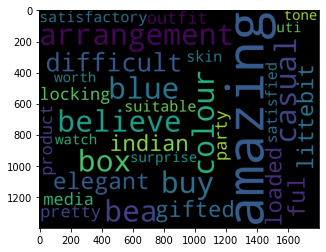

In [58]:
plt.imshow(wordcloud)

## Sentimental Analysis

In [59]:
with open("/content/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [60]:
positive_words = positive_words[35:]
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [61]:
with open("/content/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [62]:
negative_words = negative_words[35:]
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [63]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])
txt_neg_in_nw

'difficult'

In [64]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400).generate(txt_neg_in_nw)

In [65]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [66]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## Conclusion

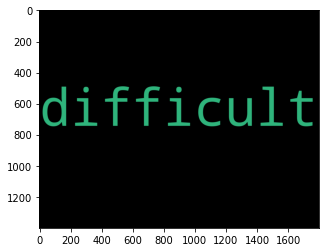

In [67]:
plt.imshow(wordcloud_neg)

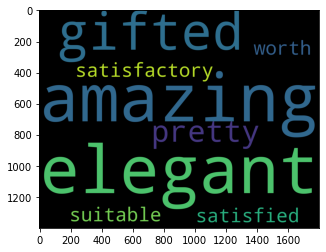

In [68]:
plt.imshow(wordcloud_pos)

## Perform emotion mining

In [73]:
!pip install spacy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
!python -m spacy download en

2022-11-02 18:08:26.735195: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Part Of Speech Tagging

In [91]:
##Part Of Speech Tagging
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = txt_upd
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [92]:
one_block

' good product na the media could not be loaded watch is good but the box in which it was placed looks like it s an old and used one very bea uti ful watch can t believe it s just it s just so elegant pretty for casual outfit or party looks those who are looking for an amazing surprise just go for it the colour is blue but it s suitable for indian skin tone the product was satisfied worth to buy it satisfactory gifted n she really liked it locking arrangement can be littebit difficult '

In [93]:
for token in doc_block[0:20]:
    print(token, token.pos_)

  SPACE
good ADJ
product NOUN
na ADP
the DET
media NOUN
could AUX
not PART
be AUX
loaded VERB
watch NOUN
is AUX
good ADJ
but CCONJ
the DET
box NOUN
in ADP
which PRON
it PRON
was AUX


In [94]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['placed', 'looks', 's', 'used', 'watch', 't', 'believe', 's', 's', 'outfit', 'party', 'looks', 'looking', 'surprise', 'go', 'colour', 's', 'skin', 'tone', 'product']


In [95]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,product,2
1,watch,2
2,looks,2
3,media,1
4,loaded,1
5,box,1
6,placed,1
7,used,1
8,believe,1
9,outfit,1


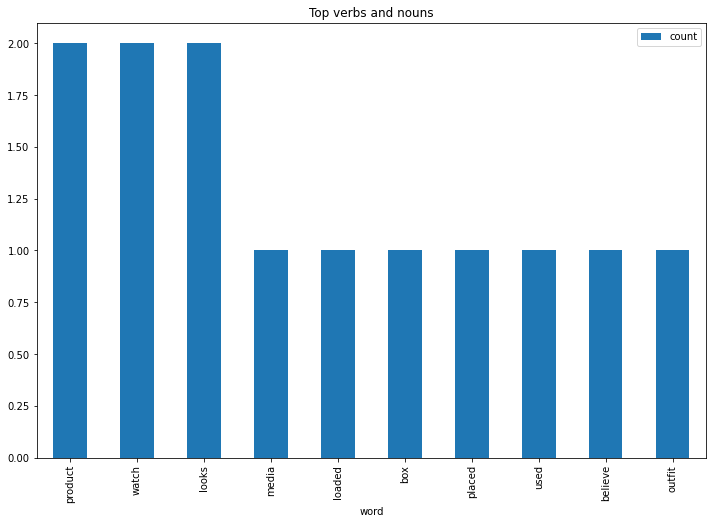

In [96]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [98]:
#tokenised 

text_tokens

['good',
 'product',
 'na',
 'the',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 'watch',
 'is',
 'good',
 'but',
 'the',
 'box',
 'in',
 'which',
 'it',
 'was',
 'placed',
 'looks',
 'like',
 'it',
 's',
 'an',
 'old',
 'and',
 'used',
 'one',
 'very',
 'bea',
 'uti',
 'ful',
 'watch',
 'can',
 't',
 'believe',
 'it',
 's',
 'just',
 'it',
 's',
 'just',
 'so',
 'elegant',
 'pretty',
 'for',
 'casual',
 'outfit',
 'or',
 'party',
 'looks',
 'those',
 'who',
 'are',
 'looking',
 'for',
 'an',
 'amazing',
 'surprise',
 'just',
 'go',
 'for',
 'it',
 'the',
 'colour',
 'is',
 'blue',
 'but',
 'it',
 's',
 'suitable',
 'for',
 'indian',
 'skin',
 'tone',
 'the',
 'product',
 'was',
 'satisfied',
 'worth',
 'to',
 'buy',
 'it',
 'satisfactory',
 'gifted',
 'n',
 'she',
 'really',
 'liked',
 'it',
 'locking',
 'arrangement',
 'can',
 'be',
 'littebit',
 'difficult']

In [100]:
sent_df = pd.DataFrame(text_tokens, columns=['words'])
sent_df

,words
0,good
1,product
2,na
3,the
4,media
...,...
92,arrangement
93,can
94,be
95,littebit


In [101]:
#Sentiment analysis
afinn = pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [102]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [103]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

## Calculate Scores for finding Emotions

In [104]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [106]:
sent_df['sentiment_value'] = sent_df['words'].apply(calculate_sentiment)

good
product
na
the
media
could
not
be
loaded
watch
is
good
but
the
box
in
which
it
was
placed
looks
like
it
s
an
old
and
used
one
very
bea
uti
ful
watch
can
t
believe
it
s
just
it
s
just
so
elegant
pretty
for
casual
outfit
or
party
looks
those
who
are
looking
for
an
amazing
surprise
just
go
for
it
the
colour
is
blue
but
it
s
suitable
for
indian
skin
tone
the
product
was
satisfied
worth
to
buy
it
satisfactory
gifted
n
she
really
liked
it
locking
arrangement
can
be
littebit
difficult


In [107]:
sent_df

,words,sentiment_value
0,good,3
1,product,0
2,na,0
3,the,0
4,media,0
...,...,...
92,arrangement,0
93,can,0
94,be,0
95,littebit,0


In [108]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    97.000000
mean      0.206186
std       0.735104
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: sentiment_value, dtype: float64

In [109]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,words,sentiment_value
1,product,0
2,na,0
3,the,0
4,media,0
5,could,0


In [114]:
sent_df['index']=range(0,len(sent_df))

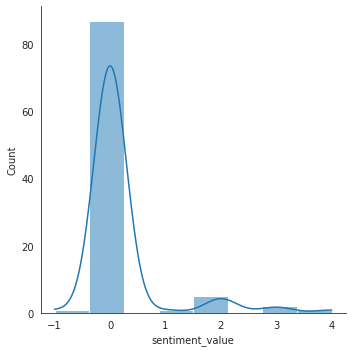

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

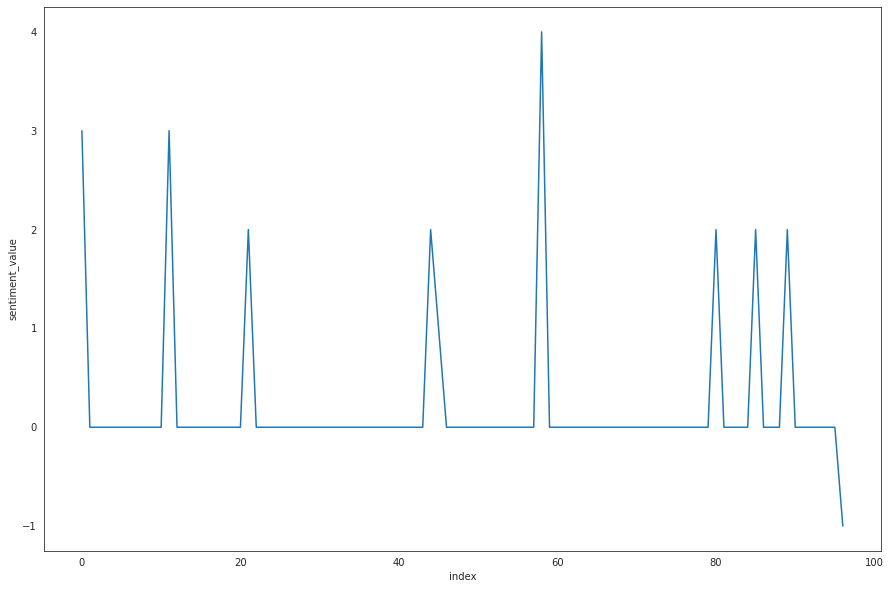

In [116]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

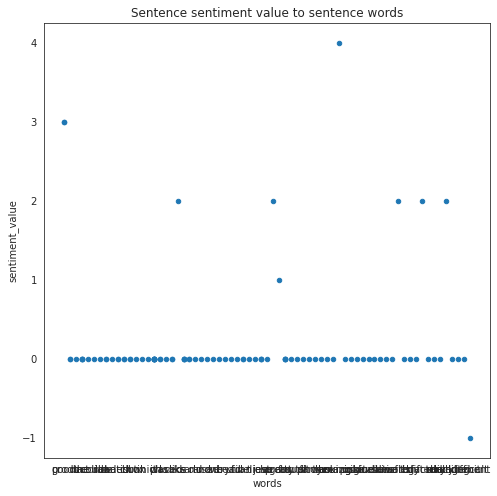

In [119]:
sent_df.plot.scatter(x='words', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence words')

# ELON_MUSK

In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import re
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

## 1 - Business Problem
Perform sentimental analysis on Elon-musk tweets

# 2 - Data collection and description

In [121]:
book=pd.read_csv(r"/content/Elon_musk.csv", encoding='cp1252')

In [122]:
book=book.iloc[:,1:]
book

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## PREPROCESSING

In [123]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
book['Text']=book['Text'].apply(preprocessor)

In [124]:
book

,Text
0,kunalb11 i m an alien
1,id_aa_carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera27 doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the neg...
1995,ppathole make sure to read ur terms amp condi...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [125]:
txt = list(book.iloc[:,0])

In [126]:
txt_upd = ' '.join(txt)

In [127]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [128]:
#Punctuation
no_punc_text = txt_upd.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu oj frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest https t co rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha https t co fc uhqsd o freewalletorg any crypto wal

In [129]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of']


In [131]:
len(text_tokens)

24250

In [132]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'https', 'co', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'thought']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
wordnet = WordNetLemmatizer()
text_tokens = word_tokenize(txt_upd)

In [134]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

## FEATURE ENGINEERING

In [135]:
# TFidf vectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)

In [136]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [137]:
df

,aa,aayypcpp,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
word_list = ' '.join(df)

In [139]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

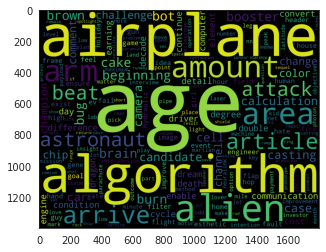

In [140]:
plt.imshow(wordcloud)

# Sentimental Analysis

In [141]:
with open("/content/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [142]:
positive_words = positive_words[35:]
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [143]:
with open("/content/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [144]:
negative_words = negative_words[35:]
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [145]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])
txt_neg_in_nw

'abort absence absurd absurdly accidental addicted agony annoying apologists attack attacks bankrupt begging bias blow bogus bombard boring break broke broken bs bug bugs bumps burn burned burns carnage challenging cloudy cold collapse complex complicated confess confusion corrosion costly crash crazy critical damaged damn danger dead death decline dense destroyer died difficult difficulties difficulty dire dirt discord distract drag dumb dust embarrassing embarrassingly emergency error excruciating excuse fail failed failing fails failure fall falling fallout false farcical fat fatigue fault faults fear fever fib fiction fist fool foolish frozen fudge funny grief grumpy hang hard hasty hate hates haunt hazard hedge hell hurt hypocrisy ignore impossible inaccurate incorrect incorrectly inevitable inflationary insane insanely intense irony irrational issue issues joke junkyard knife knock lapse latency lengthy limit limited loses losing loss lost louder ludicrous lurch madness mania mar

In [146]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400).generate(txt_neg_in_nw)

In [147]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [148]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## Conclusion

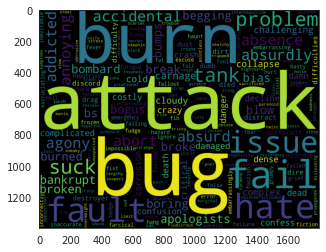

In [149]:
plt.imshow(wordcloud_neg)

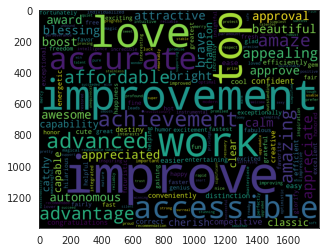

In [150]:
plt.imshow(wordcloud_pos)